In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
from PIL import Image

In [ ]:
classifer=pipeline("sentiment-analysis",device="cuda")
result=classifer("I Love you")[0]
print(f"Classification: {result['label']} and Score: {result['score']}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


Classification: POSITIVE and Score: 0.9998656511306763


In [ ]:
ner_classifier=pipeline("ner",grouped_entities=True,device="cuda")
ner_result=ner_classifier("In March 2021, Dr. Sarah Johnson and her team at GenTech Innovations embarked on a groundbreaking project focused on renewable \
energy solutions. The project, headquartered in San Francisco, aims to collaborate with various international partners, including EcoPower Europe \
in Paris and SolarTech Asia in Singapore. The announcement came during a global conference on climate change held in Tokyo, Japan, which attracted \
experts and activists from around the world, including notable speaker Elon Musk. The initiative has received significant funding from the \
Global Green Grant Fund, with a commitment to reduce carbon emissions by 40% over the next decade. This ambitious project highlights the growing \
importance of sustainable development and international cooperation in tackling environmental challenges.")
print(ner_result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda


[{'entity_group': 'PER', 'score': 0.9996027, 'word': 'Sarah Johnson', 'start': 19, 'end': 32}, {'entity_group': 'ORG', 'score': 0.9969076, 'word': 'GenTech Innovations', 'start': 49, 'end': 68}, {'entity_group': 'LOC', 'score': 0.9984195, 'word': 'San Francisco', 'start': 175, 'end': 188}, {'entity_group': 'ORG', 'score': 0.98643327, 'word': 'EcoPower Europe', 'start': 257, 'end': 272}, {'entity_group': 'LOC', 'score': 0.9993825, 'word': 'Paris', 'start': 276, 'end': 281}, {'entity_group': 'ORG', 'score': 0.99762076, 'word': 'SolarTech Asia', 'start': 286, 'end': 300}, {'entity_group': 'LOC', 'score': 0.99973804, 'word': 'Singapore', 'start': 304, 'end': 313}, {'entity_group': 'LOC', 'score': 0.99940014, 'word': 'Tokyo', 'start': 390, 'end': 395}, {'entity_group': 'LOC', 'score': 0.99975413, 'word': 'Japan', 'start': 397, 'end': 402}, {'entity_group': 'PER', 'score': 0.99678767, 'word': 'Elon Musk', 'start': 491, 'end': 500}, {'entity_group': 'ORG', 'score': 0.9429052, 'word': 'Global 

/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [ ]:
qa_classifier = pipeline("question-answering",device="cuda")
qa_result=qa_classifier(question="who is the prime minster of India" , context="prime minister of India is Modi")
print(qa_result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda


{'score': 0.9901435375213623, 'start': 27, 'end': 31, 'answer': 'Modi'}


In [ ]:
classification_classifier = pipeline("zero-shot-classification", device="cuda")
result = classification_classifier("Hugging Face's Transformers library is amazing!", candidate_labels=["technology", "sports", "politics"])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda


{'sequence': "Hugging Face's Transformers library is amazing!", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9493839740753174, 0.03225007653236389, 0.018365923315286636]}


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

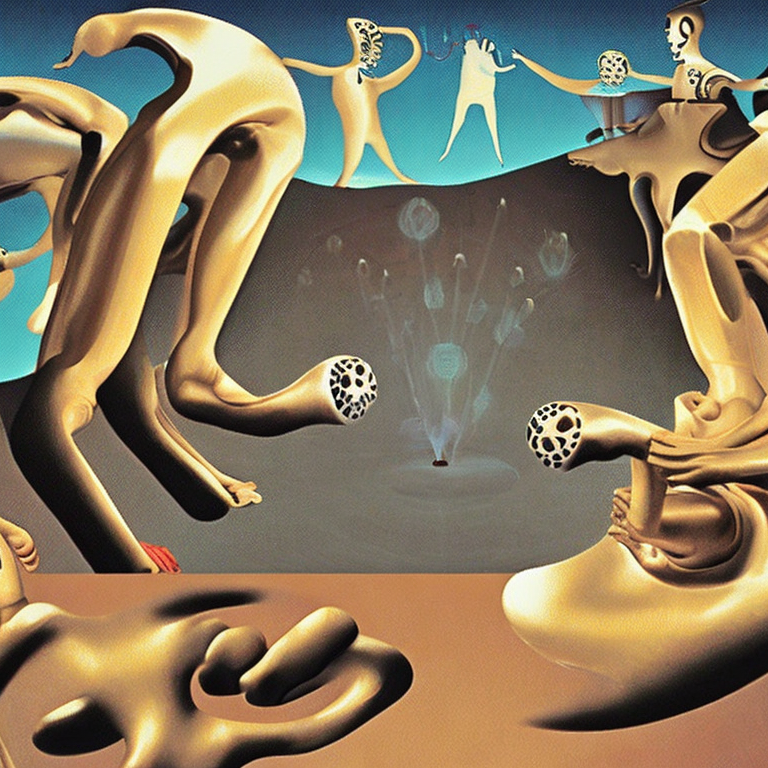

In [ ]:
image_pipeline=DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2", torch_dtype=torch.float16, use_safetensors=True,
    variant="fp16").to("cuda")
text = "A class of Data Scientists learning about AI, in the surreal style of Salvador Dali"
image = image_pipeline(prompt=text).images[0]
image
